<a href="https://colab.research.google.com/github/amejiyo/FRA503_Rescource/blob/main/Knn_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df_train = pd.read_csv("https://raw.githubusercontent.com/amejiyo/FRA503_Rescource/main/census-income.data",low_memory=False)
df_test = pd.read_csv("https://raw.githubusercontent.com/amejiyo/FRA503_Rescource/main/census-income.test",low_memory=False)
df_train.columns = ['AAGE','ACLSWKR','ADTIND','ADTOCC','EDU','AHRSPAY','ENROLL','MARTSTAT','MJINDCODE','MJOCPCAODE','RACE','HISPANORG','SEX','MEMLBUN','RUNEMPL','EMPSTAT','CAPGAIN','CAPLOSS','DIVVAL','TAXSTAT','REGPRES','STATEPRES','FAMSTAT','SUMHOUSE','INSTWEIGHT','MSACODE','REGCODE','REGCODECH','LIVE1YP','MGPSUNB','NUMEMPLY','NUMFAMUNDER18','COUNTRYF','COUNTRYM','COUNTRYSELF','CITIZEN','EMPLYEE','VETERADMIN','VETERBEF','WEEKWRK','YEAR', 'LABEL']
df_test.columns = ['AAGE','ACLSWKR','ADTIND','ADTOCC','EDU','AHRSPAY','ENROLL','MARTSTAT','MJINDCODE','MJOCPCAODE','RACE','HISPANORG','SEX','MEMLBUN','RUNEMPL','EMPSTAT','CAPGAIN','CAPLOSS','DIVVAL','TAXSTAT','REGPRES','STATEPRES','FAMSTAT','SUMHOUSE','INSTWEIGHT','MSACODE','REGCODE','REGCODECH','LIVE1YP','MGPSUNB','NUMEMPLY','NUMFAMUNDER18','COUNTRYF','COUNTRYM','COUNTRYSELF','CITIZEN','EMPLYEE','VETERADMIN','VETERBEF','WEEKWRK','YEAR', 'LABEL']
# df_test.shape


In [3]:
df_test.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,EDU,AHRSPAY,ENROLL,MARTSTAT,MJINDCODE,MJOCPCAODE,RACE,HISPANORG,SEX,MEMLBUN,RUNEMPL,EMPSTAT,CAPGAIN,CAPLOSS,DIVVAL,TAXSTAT,REGPRES,STATEPRES,FAMSTAT,SUMHOUSE,INSTWEIGHT,MSACODE,REGCODE,REGCODECH,LIVE1YP,MGPSUNB,NUMEMPLY,NUMFAMUNDER18,COUNTRYF,COUNTRYM,COUNTRYSELF,CITIZEN,EMPLYEE,VETERADMIN,VETERBEF,WEEKWRK,YEAR,LABEL
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2556.34,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


To handling the confuding information, we will select only 10 significant attributes after removing missing value and duplicates. 

In [4]:
#preprocessing of training data
#delete missing value + reset index
df_train = df_train.dropna(axis=0,how='any')
# for i in df_train.columns:
#     try:
#         df_train = df_train[df_train[i].str.contains("\?")==False]
#     except:
#         pass
# df_train = df_train.reset_index().reindex(df_train.columns, axis=1)
#remove duplicates
df_train = df_train.drop_duplicates(subset=None)
#training set
df_train['SEX'].replace({" Male": 0, " Female": 1}, inplace=True)
df_train['YEAR'].replace({94: 0, 95: 1}, inplace=True)
df_train['LABEL'].replace({" - 50000.": 0," 50000+.": 1}, inplace=True)

#testning set
df_test['SEX'].replace({" Male": 0, " Female": 1}, inplace=True)
df_test['YEAR'].replace({94: 0, 95: 1}, inplace=True)
df_test['LABEL'].replace({" - 50000.": 0," 50000+.": 1}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [5]:
col_category = ['ACLSWKR','ADTIND','ADTOCC','EDU','ENROLL','MARTSTAT','MJINDCODE','MJOCPCAODE','RACE','HISPANORG','MEMLBUN','RUNEMPL','EMPSTAT','TAXSTAT','REGPRES','STATEPRES','FAMSTAT','SUMHOUSE','MSACODE','REGCODE','REGCODECH','LIVE1YP','MGPSUNB','NUMFAMUNDER18','COUNTRYF','COUNTRYM','COUNTRYSELF','CITIZEN','EMPLYEE','VETERADMIN','VETERBEF']

for i in df_train.columns:
    if i in col_category:
        df_train[i] = df_train[i].astype(str)
        df_test[i] = df_test[i].astype(str)


In [6]:
df_train_drop_ques = pd.get_dummies(df_train.drop(columns=['MSACODE','REGCODECH','REGCODE','MGPSUNB']))
df_test_drop_ques = pd.get_dummies(df_test.drop(columns=['MSACODE','REGCODECH','REGCODE','MGPSUNB']))

In [7]:
for i in df_train.columns:
    try:
        df_train = df_train[df_train[i].str.contains("\?")==False]
    except:
        pass
df_train = df_train.reset_index().reindex(df_train.columns, axis=1)

for i in df_test.columns:
    try:
        df_test = df_test[df_test[i].str.contains("\?")==False]
    except:
        pass
df_test = df_test.reset_index().reindex(df_test.columns, axis=1)

In [8]:
df_train_onehot = pd.get_dummies(df_train)
df_test_onehot = pd.get_dummies(df_test)
df_test_drop_ques['FAMSTAT_ Grandchild <18 ever marr not in subfamily'] = 0
df_test_onehot['FAMSTAT_ Grandchild <18 ever marr not in subfamily'] = 0

col = df_test_onehot.columns
cols = df_train_onehot.columns
for i in cols:
    if i not in col:
        print(i)
# print(df_test_onehot.shape)
# print(df_test_onehot.shape)
y_train = df_train_onehot.LABEL
x_train = df_train_onehot.iloc[:,0:df_train_onehot.shape[1]]

y_train_drop = df_train_drop_ques.LABEL
x_train_drop = df_train_drop_ques.iloc[:,0:df_train_drop_ques.shape[1]].drop(columns=['LABEL'])

#test
y_test = df_test_onehot.LABEL
x_test = df_test_onehot.iloc[:,0:df_train_onehot.shape[1]]

y_test_drop = df_test_drop_ques.LABEL
x_test_drop = df_test_drop_ques.iloc[:,0:df_train_onehot.shape[1]].drop(columns=['LABEL'])
col = x_train.columns
# print(col.to_list())

ADTIND_10
FAMSTAT_ Other Rel <18 ever marr RP of subfamily


In [9]:
print(col.to_list())

['AAGE', 'AHRSPAY', 'SEX', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'INSTWEIGHT', 'NUMEMPLY', 'WEEKWRK', 'YEAR', 'LABEL', 'ACLSWKR_ Federal government', 'ACLSWKR_ Local government', 'ACLSWKR_ Never worked', 'ACLSWKR_ Not in universe', 'ACLSWKR_ Private', 'ACLSWKR_ Self-employed-incorporated', 'ACLSWKR_ Self-employed-not incorporated', 'ACLSWKR_ State government', 'ACLSWKR_ Without pay', 'ADTIND_0', 'ADTIND_1', 'ADTIND_10', 'ADTIND_11', 'ADTIND_12', 'ADTIND_13', 'ADTIND_14', 'ADTIND_15', 'ADTIND_16', 'ADTIND_17', 'ADTIND_18', 'ADTIND_19', 'ADTIND_2', 'ADTIND_20', 'ADTIND_21', 'ADTIND_22', 'ADTIND_23', 'ADTIND_24', 'ADTIND_25', 'ADTIND_26', 'ADTIND_27', 'ADTIND_28', 'ADTIND_29', 'ADTIND_3', 'ADTIND_30', 'ADTIND_31', 'ADTIND_32', 'ADTIND_33', 'ADTIND_34', 'ADTIND_35', 'ADTIND_36', 'ADTIND_37', 'ADTIND_38', 'ADTIND_39', 'ADTIND_4', 'ADTIND_40', 'ADTIND_41', 'ADTIND_42', 'ADTIND_43', 'ADTIND_44', 'ADTIND_45', 'ADTIND_46', 'ADTIND_47', 'ADTIND_48', 'ADTIND_49', 'ADTIND_5', 'ADTIND_50', 'ADTIND_51', '

In [10]:
#apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
#label
#training set
pca.fit_transform(x_train.values)
x_train_PCA = pca.transform(x_train)
x_train_PCA = pd.DataFrame(x_train_PCA, columns=['PC1','PC2','PC3','PC4','PC5'])

pca_drop = PCA(n_components=5)
pca_drop.fit_transform(x_train_drop.values)
x_train_PCA_drop = pca_drop.transform(x_train_drop)
x_train_PCA_drop = pd.DataFrame(x_train_PCA_drop, columns=['PC1','PC2','PC3','PC4','PC5'])

In [11]:
print(pca.explained_variance_ratio_.cumsum())
print(pca_drop.explained_variance_ratio_.cumsum())

[0.80475736 0.9550101  0.99377519 0.99697222 0.99995687]
[0.81635784 0.95841355 0.99445876 0.99725442 0.99996134]


In [12]:
pca_onehot = PCA(n_components=2)
#onehot
#training set
pca_onehot.fit_transform(x_train.values)
x_train_onehot_PCA = pca_onehot.transform(x_train)
x_train_onehot_PCA = pd.DataFrame(x_train_onehot_PCA, columns=['PC1','PC2'])
# x_train_label_PCA 

#testing set
x_test_onehot_PCA = pca_onehot.transform(x_test)
x_test_onehot_PCA = pd.DataFrame(x_test_onehot_PCA, columns=['PC1','PC2'])

pca_drop = PCA(n_components=2)

pca_drop.fit_transform(x_train_drop.values)
x_train_onehot_PCA_drop = pca_drop.transform(x_train_drop)
x_train_onehot_PCA_drop = pd.DataFrame(x_train_onehot_PCA_drop, columns=['PC1','PC2'])
# x_train_label_PCA 

#testing set
x_test_onehot_PCA_drop = pca_drop.transform(x_test_drop)
x_test_onehot_PCA_drop = pd.DataFrame(x_test_onehot_PCA_drop, columns=['PC1','PC2'])

In [13]:
print(pca_onehot.explained_variance_ratio_.cumsum())
print(pca_drop.explained_variance_ratio_.cumsum())

[0.80475736 0.9550101 ]
[0.81635784 0.95841355]


Minimum error:- 0.05374845881657161 at K = 18


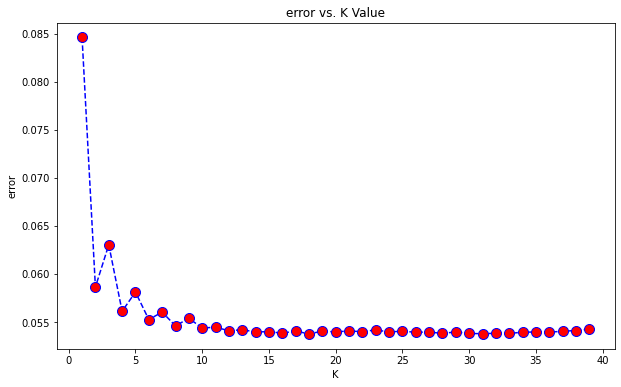

In [14]:
#create model
#import machine learning library
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#onehot
#find best k
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_onehot_PCA_drop,y_train_drop)
    pred_i = knn.predict(x_test_onehot_PCA_drop)
    error.append(np.mean(pred_i != y_test_drop))

#visualization
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('error vs. K Value')
plt.xlabel('K')
plt.ylabel('error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [15]:
knn = KNeighborsClassifier(n_neighbors= 18)
model_knn = knn.fit(x_train_onehot_PCA,y_train)
y_pred_knn = model_knn.predict(x_train_onehot_PCA)

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
#training set
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred_knn))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_knn))

Classification report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     88111
           1       0.80      0.19      0.30      5479

    accuracy                           0.95     93590
   macro avg       0.88      0.59      0.64     93590
weighted avg       0.94      0.95      0.93     93590

Confusion matrix 
[[87861   250]
 [ 4458  1021]]


In [16]:
knn = KNeighborsClassifier(n_neighbors= 18)
model_knn = knn.fit(x_train_onehot_PCA,y_train)
y_pred_knn = model_knn.predict(x_test_onehot_PCA)

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
#training set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_knn))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_knn))

Classification report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44708
           1       0.80      0.19      0.30      2683

    accuracy                           0.95     47391
   macro avg       0.87      0.59      0.64     47391
weighted avg       0.94      0.95      0.94     47391

Confusion matrix 
[[44580   128]
 [ 2184   499]]


In [17]:
kn = KNeighborsClassifier(n_neighbors= 18)
model_knn = kn.fit(x_train_onehot_PCA_drop,y_train_drop)
y_pred_knn = model_knn.predict(x_test_onehot_PCA_drop)

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
#training set
print("Classification report \n=======================")
print(classification_report(y_true=y_test_drop, y_pred=y_pred_knn))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test_drop, y_pred=y_pred_knn))

Classification report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     93575
           1       0.74      0.21      0.32      6186

    accuracy                           0.95     99761
   macro avg       0.84      0.60      0.65     99761
weighted avg       0.94      0.95      0.93     99761

Confusion matrix 
[[93128   447]
 [ 4915  1271]]
